In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import time

pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import scipy.stats
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score ,f1_score ,roc_auc_score, accuracy_score,recall_score, log_loss
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from dython.nominal import associations

In [3]:
def make_mi_scores_Classif(X_train, y_train):
    # All discrete features should now have integer dtypes (double-check this before using MI!)
    discrete_features = X_train.dtypes == int
    mi_scores = mutual_info_classif(X_train, y_train, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.figure(figsize=(20,14))
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [4]:
df = pd.read_csv("C:\\Users\\user\\Solo Dolo\\EPL Analysis\\All_Probs.csv")
df.shape

(3064, 28)

In [5]:
df.head()

,Team,Opponent,Result,Season,Win_p1,Win_p2,Win_p3,Win_p4,Win_p5,Win_p6,Win_p7,Win_p8,Lose_p1,Lose_p2,Lose_p3,Lose_p4,Lose_p5,Lose_p6,Lose_p7,Lose_p8,Draw_p1,Draw_p2,Draw_p3,Draw_p4,Draw_p5,Draw_p6,Draw_p7,Draw_p8
0,Cardiff City,Brighton,W,2019,0.799095,0.670389,0.759173,0.736025,0.730971,0.717456,0.765054,0.710793,0.116386,0.087573,0.086228,0.069821,0.130983,0.097853,0.102432,0.092946,0.078335,0.083393,0.058514,0.062027,0.088271,0.098452,0.077570,0.086562
1,Cardiff City,Everton,L,2019,0.025695,0.051892,0.037517,0.049244,0.020827,0.055643,0.061895,0.061746,0.915573,0.832355,0.922212,0.863051,0.917961,0.836748,0.904072,0.854537,0.090125,0.099973,0.038901,0.082094,0.058669,0.115021,0.073613,0.098932
2,Cardiff City,Wolves,W,2019,0.799912,0.684858,0.780391,0.700803,0.765769,0.705525,0.826955,0.712171,0.091492,0.120586,0.144543,0.101338,0.182688,0.110774,0.103196,0.114000,0.106814,0.091498,0.127900,0.070248,0.129950,0.104341,0.097143,0.082102
3,Cardiff City,West Ham,L,2019,0.074541,0.063685,0.065787,0.064898,0.066737,0.070636,0.069982,0.060197,0.813001,0.827718,0.843123,0.814025,0.815487,0.831127,0.797249,0.838307,0.080972,0.055055,0.103174,0.051023,0.056356,0.060160,0.066930,0.052114
4,Cardiff City,Southampton,W,2019,0.686976,0.559005,0.644704,0.570888,0.648832,0.558509,0.708552,0.584590,0.096596,0.138122,0.133673,0.134798,0.139522,0.134892,0.112923,0.121794,0.278530,0.228738,0.281523,0.191479,0.273408,0.233259,0.253448,0.228645


In [6]:
Win_preds = [i for i in df.columns if 'Win' in i and i != 'Win' ]
Lose_preds = [i for i in df.columns if 'Lose' in i and i != 'Lose' ]
Draw_preds = [i for i in df.columns if 'Draw' in i and i != 'Draw' ]

df['Win_mean'] = df[Win_preds].mean(axis=1)
df['Lose_mean'] = df[Lose_preds].mean(axis=1)
df['Draw_mean'] = df[Draw_preds].mean(axis=1)

df['Points'] = df.apply(lambda x : 3 if x.Result == 'W' else (1 if x.Result == 'D' else 0) ,axis=1)
df['Win'] = df.apply(lambda x : 1 if x.Result == 'W' else 0 ,axis=1)

df.head()

,Team,Opponent,Result,Season,Win_p1,Win_p2,Win_p3,Win_p4,Win_p5,Win_p6,Win_p7,Win_p8,Lose_p1,Lose_p2,Lose_p3,Lose_p4,Lose_p5,Lose_p6,Lose_p7,Lose_p8,Draw_p1,Draw_p2,Draw_p3,Draw_p4,Draw_p5,Draw_p6,Draw_p7,Draw_p8,Win_mean,Lose_mean,Draw_mean,Points,Win
0,Cardiff City,Brighton,W,2019,0.799095,0.670389,0.759173,0.736025,0.730971,0.717456,0.765054,0.710793,0.116386,0.087573,0.086228,0.069821,0.130983,0.097853,0.102432,0.092946,0.078335,0.083393,0.058514,0.062027,0.088271,0.098452,0.077570,0.086562,0.736119,0.098028,0.079140,3,1
1,Cardiff City,Everton,L,2019,0.025695,0.051892,0.037517,0.049244,0.020827,0.055643,0.061895,0.061746,0.915573,0.832355,0.922212,0.863051,0.917961,0.836748,0.904072,0.854537,0.090125,0.099973,0.038901,0.082094,0.058669,0.115021,0.073613,0.098932,0.045558,0.880814,0.082166,0,0
2,Cardiff City,Wolves,W,2019,0.799912,0.684858,0.780391,0.700803,0.765769,0.705525,0.826955,0.712171,0.091492,0.120586,0.144543,0.101338,0.182688,0.110774,0.103196,0.114000,0.106814,0.091498,0.127900,0.070248,0.129950,0.104341,0.097143,0.082102,0.747048,0.121077,0.101249,3,1
3,Cardiff City,West Ham,L,2019,0.074541,0.063685,0.065787,0.064898,0.066737,0.070636,0.069982,0.060197,0.813001,0.827718,0.843123,0.814025,0.815487,0.831127,0.797249,0.838307,0.080972,0.055055,0.103174,0.051023,0.056356,0.060160,0.066930,0.052114,0.067058,0.822505,0.065723,0,0
4,Cardiff City,Southampton,W,2019,0.686976,0.559005,0.644704,0.570888,0.648832,0.558509,0.708552,0.584590,0.096596,0.138122,0.133673,0.134798,0.139522,0.134892,0.112923,0.121794,0.278530,0.228738,0.281523,0.191479,0.273408,0.233259,0.253448,0.228645,0.620257,0.126540,0.246129,3,1


In [7]:
df.Result.value_counts()

W    1259
L    1130
D     675
Name: Result, dtype: int64

In [7]:
df2 = df.drop(Win_preds+Lose_preds+Draw_preds,axis=1)
df2.head()

,Team,Opponent,Result,Season,Win_mean,Lose_mean,Draw_mean,Points,Win
0,Cardiff City,Brighton,W,2019,0.736119,0.098028,0.079140,3,1
1,Cardiff City,Everton,L,2019,0.045558,0.880814,0.082166,0,0
2,Cardiff City,Wolves,W,2019,0.747048,0.121077,0.101249,3,1
3,Cardiff City,West Ham,L,2019,0.067058,0.822505,0.065723,0,0
4,Cardiff City,Southampton,W,2019,0.620257,0.126540,0.246129,3,1


In [9]:
df.Points.value_counts()

3    1259
0    1130
1     675
Name: Points, dtype: int64

In [27]:
chelsea_2022 = df2[(df2.Season==2022) & (df2.Team=='Chelsea')]
chelsea_2022

,Team,Opponent,Result,Season,Win_mean,Lose_mean,Draw_mean,Points,Win
2459,Chelsea,Aston Villa,W,2022,0.862353,0.098034,0.118424,3,1
2460,Chelsea,Champions Lg,W,2022,0.898708,0.098970,0.072105,3,1
2461,Chelsea,Tottenham,W,2022,0.813494,0.142591,0.071404,3,1
2462,Chelsea,Aston Villa,D,2022,0.909584,0.074546,0.068873,1,0
2463,Chelsea,Manchester City,L,2022,0.113403,0.891747,0.057026,0,0
2464,Chelsea,Champions Lg,L,2022,0.129169,0.774510,0.054262,0,0
2465,Chelsea,Southampton,W,2022,0.815740,0.121802,0.137622,3,1
2466,Chelsea,Brentford,W,2022,0.818477,0.144225,0.072500,3,1
2467,Chelsea,Champions Lg,W,2022,0.931895,0.055769,0.032790,3,1
2468,Chelsea,Norwich City,W,2022,0.921293,0.069546,0.082794,3,1


In [56]:
chelsea_2022.shape

(53, 9)

In [28]:
mean_cols = [i for i in df2.columns if 'mean' in i]
mean_cols

['Win_mean', 'Lose_mean', 'Draw_mean']

In [35]:
LR_win = LogisticRegression(solver='liblinear', random_state=1)
LR_win.fit(df2[mean_cols], df2['Win'])
Win_coef = LR_win.coef_[0]
dict(zip(mean_cols,Win_coef))

{'Win_mean': 4.558540998938163,
 'Lose_mean': -1.5959248932717562,
 'Draw_mean': -1.580414489914156}

In [38]:
df2

,Team,Opponent,Result,Season,Win_mean,Lose_mean,Draw_mean,Points,Win
0,Cardiff City,Brighton,W,2019,0.736119,0.098028,0.079140,3,1
1,Cardiff City,Everton,L,2019,0.045558,0.880814,0.082166,0,0
2,Cardiff City,Wolves,W,2019,0.747048,0.121077,0.101249,3,1
3,Cardiff City,West Ham,L,2019,0.067058,0.822505,0.065723,0,0
4,Cardiff City,Southampton,W,2019,0.620257,0.126540,0.246129,3,1
...,...,...,...,...,...,...,...,...,...
3059,Wolverhampton Wanderers,Brighton,L,2022,0.544109,0.315793,0.315543,0,0
3060,Wolverhampton Wanderers,Chelsea,D,2022,0.279775,0.380191,0.353097,1,0
3061,Wolverhampton Wanderers,Manchester City,L,2022,0.264745,0.680661,0.167612,0,0
3062,Wolverhampton Wanderers,Norwich City,D,2022,0.374628,0.421356,0.281479,1,0


In [41]:
LR_win.predict_proba(df2[mean_cols])[:,1]

array([0.8457719 , 0.0629623 , 0.84289247, ..., 0.17995915, 0.31392292,
       0.18503304])

In [36]:
LR_Points = LogisticRegression(solver='liblinear', random_state=1)
LR_Points.fit(df2[mean_cols], df2['Points'])
Points_coef = LR_Points.coef_[0]
dict(zip(mean_cols,Points_coef))

{'Win_mean': -2.878112496924523,
 'Lose_mean': 3.6665971934169943,
 'Draw_mean': -2.500955835803383}

In [42]:
LR_Points.predict(df2[mean_cols])

array([3, 0, 3, ..., 0, 0, 0], dtype=int64)

In [44]:
mask_2022 = (df2.Season!=2022)
df_train_full= df2.loc[mask_2022,mean_cols+['Win']]
print('df_train_full.shape :', df_train_full.shape)
df_train_full.head()

df_train_full.shape : (2274, 4)


,Win_mean,Lose_mean,Draw_mean,Win
0,0.736119,0.098028,0.079140,1
1,0.045558,0.880814,0.082166,0
2,0.747048,0.121077,0.101249,1
3,0.067058,0.822505,0.065723,0
4,0.620257,0.126540,0.246129,1


<AxesSubplot:xlabel='Win_mean', ylabel='Density'>

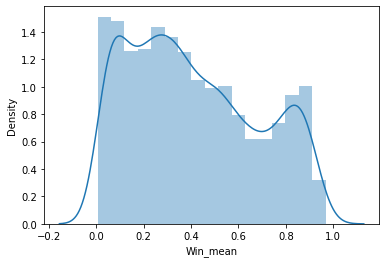

In [45]:
sns.distplot(df2.Win_mean)

<AxesSubplot:xlabel='Lose_mean', ylabel='Win_mean'>

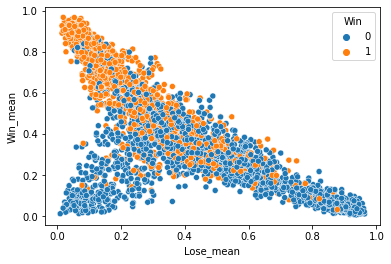

In [50]:
sns.scatterplot(df2.Lose_mean,df2.Win_mean,hue=df2['Win'])

In [51]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
xg

In [52]:
def train(df,features, y, C=1.0):
    #cat = df[categorical + numerical].to_dict(orient='records')
    
    #dv = DictVectorizer(sparse=False)
    #dv.fit(cat)

    #X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(df[features],y)

    return  model


def predict( df,features,model):
    #cat = df[categorical + numerical].to_dict(orient='records')
    
    #X = dv.transform(cat)

    y_pred = model.predict_proba(df[features])[:, 1]

    return y_pred

In [53]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.Win.values
        y_val = df_val.Win.values

        model = train(df_train,mean_cols,y_train, C=C)
        y_pred = predict(df_val,mean_cols,model )
        
        #print(f"C {C} Precision _Macro_Micro : ",precision_score(y_val, y_pred, average = 'macro'),precision_score(y_val, y_pred, average = 'micro'))# print("Precision : ",precision_score(test[target], preds))
        #print(f" C{C} F1_score _Macro_Micro : ",f1_score(y_val,y_pred, average = 'macro'),f1_score(y_val, y_pred, average = 'micro'))
        auc = roc_auc_score(y_val, y_pred,)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.850 ± 0.013
C=0.01, auc = 0.853 ± 0.013
C=0.1, auc = 0.855 ± 0.013
C=0.5, auc = 0.856 ± 0.013
C=1, auc = 0.856 ± 0.013
C=10, auc = 0.856 ± 0.013


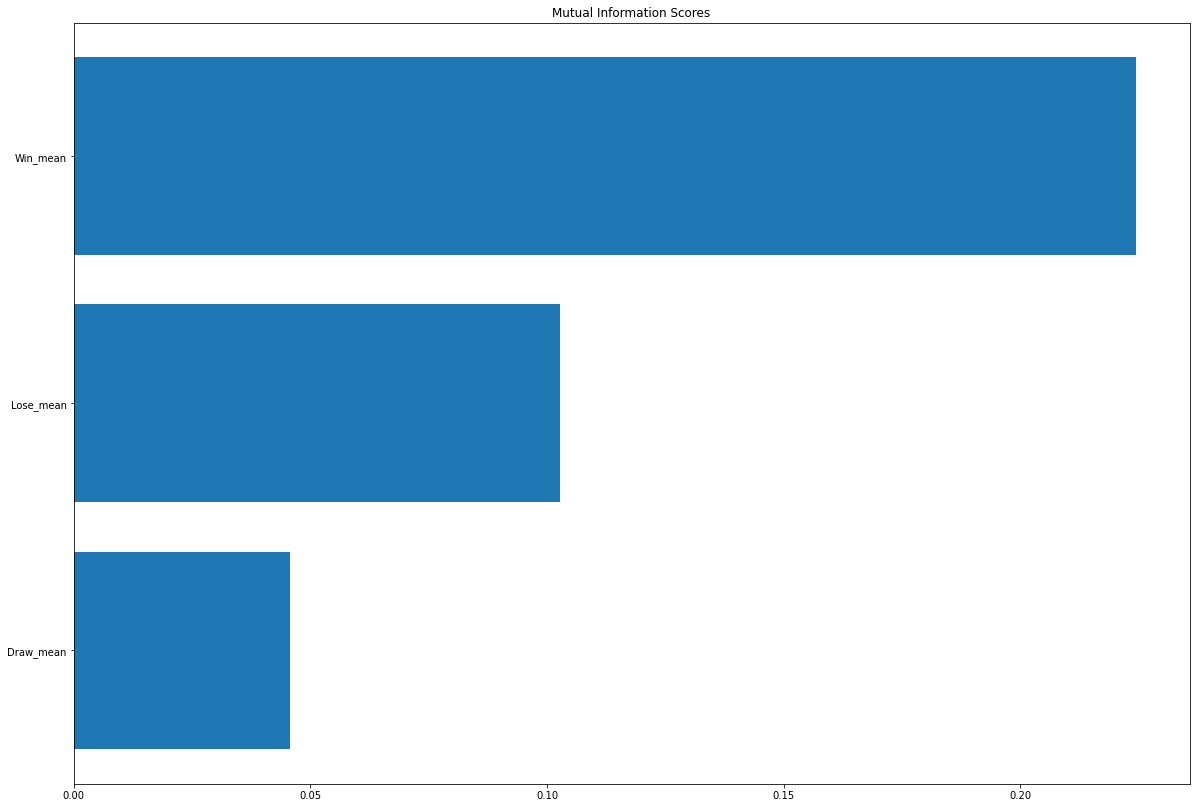

In [54]:
mi_scores_1 = make_mi_scores_Classif(X_train=df2.loc[:,mean_cols], y_train=df['Win'])
plot_mi_scores(scores=mi_scores_1)

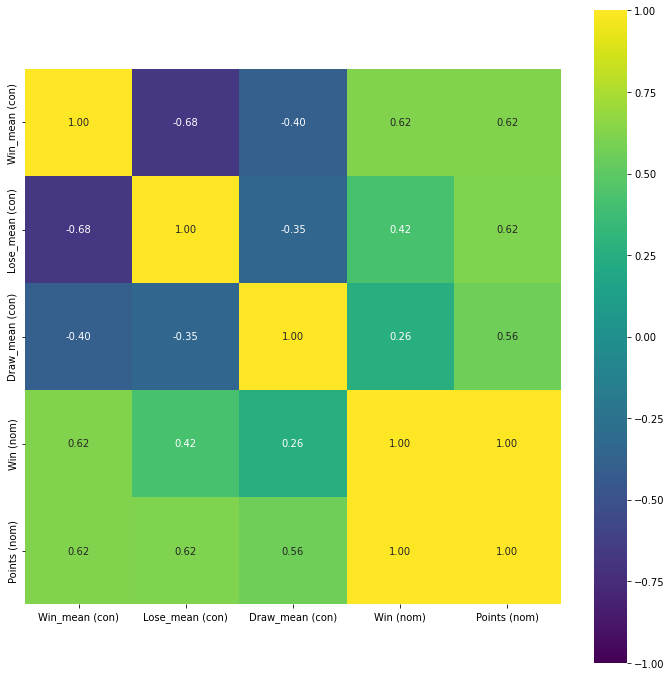

In [55]:
fig,ax = plt.subplots(figsize=(12,12))
associations(dataset=df2[mean_cols+['Win','Points']],numerical_columns=mean_cols,nan_replace_value=0,cmap='viridis',mark_columns=True,ax=ax)
fig.savefig("Predictions_with_mean.png")